<a href="https://colab.research.google.com/github/rlarjsdn4505/first-repository/blob/master/%EC%84%9C%EB%B3%84%204%EB%B2%88%20%EA%B0%80%EC%84%A4.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.neighbors import KNeighborsClassifier
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix

In [ ]:
df1 = pd.read_csv('/df1.csv')

In [ ]:
df1.columns

Index(['주문ID', '리뷰ID', '리뷰점수', '리뷰작성일', '주문상태', '구매일시', '실제배송일', '예상배송일',
       '고객고유ID', '고객우편번호앞자리', '고객도시', '고객주', '주문개수', '상품가격합계', '배송비합계',
       '상품카테고리', '결제금액(주문합)', '총결제금액', '배송지연일수', '배송지연여부'],
      dtype='object')

# 1

In [ ]:
import os
font_path = '/NanumGothic.ttf'
print('exists:', os.path.exists(font_path), 'cwd:', os.getcwd())

import matplotlib as mpl
import matplotlib.pyplot as plt
from matplotlib import font_manager as fm

fm._load_fontmanager(try_read_cache=False)

fm.fontManager.addfont(font_path)
prop = fm.FontProperties(fname=font_path)
family_name = prop.get_name()
print('detected family:', family_name)
mpl.rcParams['font.family'] = family_name
mpl.rcParams['axes.unicode_minus'] = False

exists: True cwd: /content
detected family: NanumGothic


In [ ]:
# 고객별 주문 횟수 계산
df1['고객_주문횟수'] = df1.groupby('고객고유ID')['주문ID'].transform('nunique')

# 재구매 여부 (0=신규, 1=재구매)
df1['재구매여부'] = (df1['고객_주문횟수'] > 1).astype(int)

df1[['고객고유ID','주문ID','고객_주문횟수','재구매여부']].head(10)

,고객고유ID,주문ID,고객_주문횟수,재구매여부
0,871766c5855e863f6eccc05f988b23cb,00010242fe8c5a6d1ba2dd792cb16214,1,0
1,eb28e67c4c0b83846050ddfb8a35d051,00018f77f2f0320c557190d7a144bdd3,2,1
2,3818d81c6709e39d06b2738a8d3a2474,000229ec398224ef6ca0657da4fc703e,1,0
3,af861d436cfc08b2c2ddefd0ba074622,00024acbcdf0a6daa1e931b038114c75,1,0
4,64b576fb70d441e8f1b2d7d446e483c5,00042b26cf59d7ce69dfabb4e55b4fd9,1,0
5,85c835d128beae5b4ce8602c491bf385,00048cc3ae777c65dbb7d2a0634bc1ea,1,0
6,635d9ac1680f03288e72ada3a1035803,00054e8431b9d7675808bcb819fb4a32,1,0
7,639d23421f5517f69d0c3d6e6564cf0e,0005a1a1728c9d785b8e2b08b904576c,1,0
8,0782c41380992a5a533489063df0eef6,0005f50442cb953dcd1d21e1fb923495,1,0
9,107e6259485efac66428a56f10801f4f,00061f2a7bc09da83e415a52dc8a4af1,1,0


In [ ]:
# 신규 vs 재구매 평균 점수 비교
mean_scores = df1.groupby('재구매여부')['리뷰점수'].mean()
count_scores = df1.groupby('재구매여부')['리뷰점수'].count()

print("평균 리뷰점수:\n", mean_scores)
print("샘플 수:\n", count_scores)

평균 리뷰점수:
 재구매여부
0    4.236247
1    4.326241
Name: 리뷰점수, dtype: float64
샘플 수:
 재구매여부
0    78600
1     3948
Name: 리뷰점수, dtype: int64


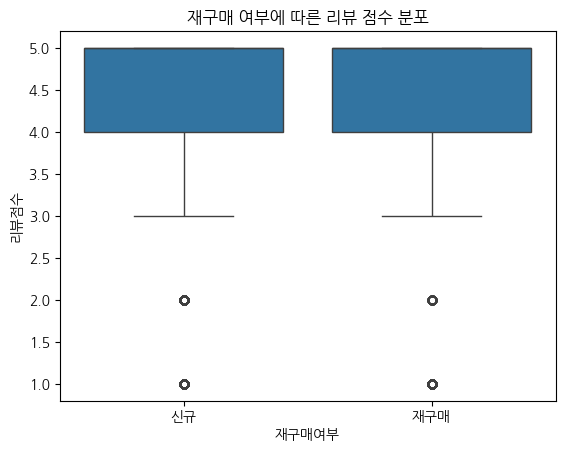

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.boxplot(x='재구매여부', y='리뷰점수', data=df1)
plt.xticks([0,1], ['신규', '재구매'])
plt.title("재구매 여부에 따른 리뷰 점수 분포")
plt.show()

In [ ]:
from scipy.stats import ttest_ind

new_customers = df1.loc[df1['재구매여부']==0, '리뷰점수'].dropna()
repeat_customers = df1.loc[df1['재구매여부']==1, '리뷰점수'].dropna()

t_stat, p_val = ttest_ind(new_customers, repeat_customers, equal_var=False)

print("신규 평균:", new_customers.mean())
print("재구매 평균:", repeat_customers.mean())
print("t-통계량:", t_stat, "p-값:", p_val)

신규 평균: 4.236246819338422
재구매 평균: 4.326241134751773
t-통계량: -4.782150582527931 p-값: 1.7911022996172908e-06


 "재구매 고객이 신규 고객보다 평균 리뷰 점수가 통계적으로는 유의미하게 높았지만, 실제 점수 차이는 약 0.1점 수준으로 크지 않았다."

 "즉, 재구매 고객이 조금 더 긍정적으로 평가하는 경향은 있으나, 실무적으로 큰 차이라고 보기는 어렵다."

In [ ]:
import numpy as np

mean_diff = repeat_customers.mean() - new_customers.mean()
pooled_std = np.sqrt(((new_customers.std()**2) + (repeat_customers.std()**2)) / 2)
cohens_d = mean_diff / pooled_std

print("평균 차이:", mean_diff)
print("Cohen's d:", cohens_d)

평균 차이: 0.08999431541335046
Cohen's d: 0.07644124444487689


✅ 종합적으로

통계적으로는 p값이 작아서 차이가 유의하다고 나오지만,

실제 효과 크기(Cohen’s d)는 0.076 → 사실상 무시해도 될 정도의 차이라는 뜻

재구매 고객과 신규 고객의 리뷰 점수는 통계적으로 유의미한 차이를 보였으나 (p < 0.001), 평균 차이는 약 0.09점에 불과했고 효과 크기(Cohen’s d=0.076)는 매우 작음. 따라서 실무적으로는 큰 차이라고 보기 어려움.

In [ ]:
state_mean = df1.groupby('고객주')['리뷰점수'].mean().sort_values(ascending=False)
city_mean = df1.groupby('고객도시')['리뷰점수'].mean().sort_values(ascending=False)

print("주별 평균 리뷰점수:\n", state_mean.head(10))
print("도시별 평균 리뷰점수:\n", city_mean.head(10))

주별 평균 리뷰점수:
 고객주
AM    4.356436
PR    4.292683
SP    4.292439
RN    4.285326
RS    4.275452
MS    4.264151
MT    4.262794
MG    4.241908
RO    4.230337
PE    4.223005
Name: 리뷰점수, dtype: float64
도시별 평균 리뷰점수:
 고객도시
abaira                     5.0
xapuri                     5.0
abadia dos dourados        5.0
abdon batista              5.0
vitoria das missoes        5.0
espirito santo do turvo    5.0
esplanada                  5.0
estevao de araujo          5.0
estiva                     5.0
estrela d oeste            5.0
Name: 리뷰점수, dtype: float64


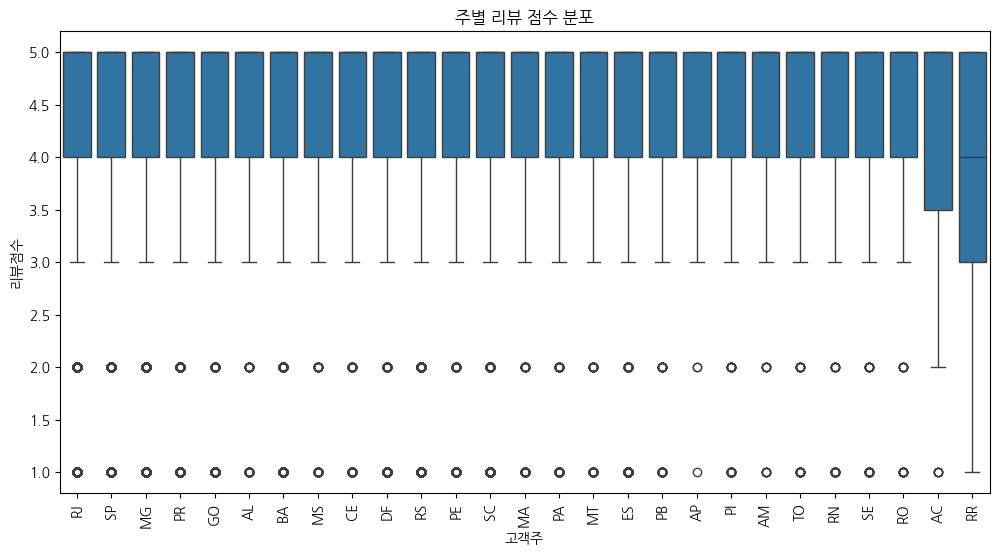

In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.figure(figsize=(12,6))
sns.boxplot(x='고객주', y='리뷰점수', data=df1)
plt.xticks(rotation=90)
plt.title("주별 리뷰 점수 분포")
plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 주별 점수 차이
anova = ols("리뷰점수 ~ C(고객주)", data=df1).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print(anova_table)

                 sum_sq       df          F        PR(>F)
C(고객주)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN


고객주
AM    4.356436
PR    4.292683
SP    4.292439
RN    4.285326
RS    4.275452
MS    4.264151
MT    4.262794
MG    4.241908
RO    4.230337
PE    4.223005
SC    4.222442
DF    4.197137
GO    4.183038
CE    4.182371
AP    4.170213
ES    4.166473
PI    4.162921
TO    4.146667
RJ    4.145714
PB    4.130208
SE    4.117188
PA    4.086580
AL    4.066007
BA    4.039119
MA    4.019504
AC    4.018182
RR    3.850000
Name: 리뷰점수, dtype: float64


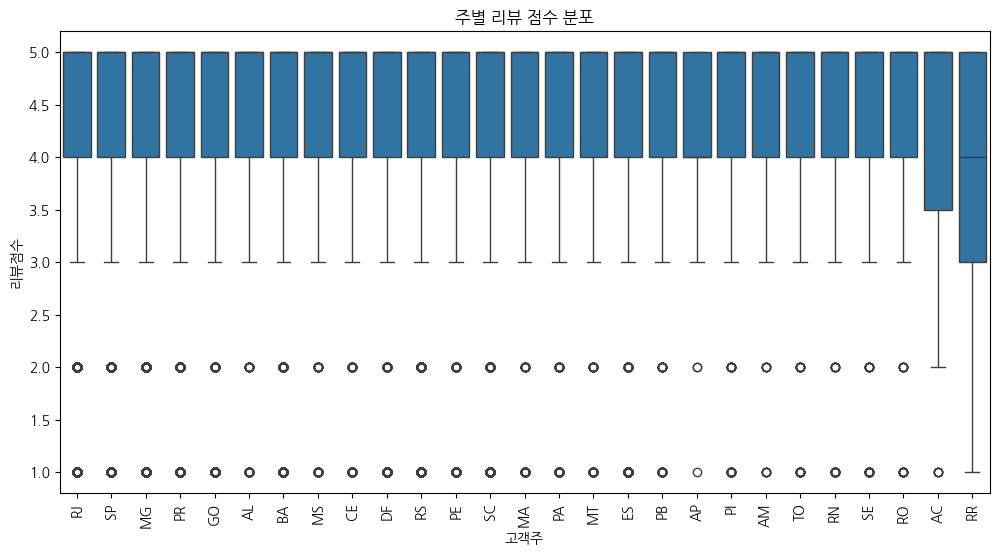

                 sum_sq       df          F        PR(>F)
C(고객주)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN


In [ ]:
import seaborn as sns
import matplotlib.pyplot as plt
import statsmodels.api as sm
from statsmodels.formula.api import ols

# 주별 평균 리뷰 점수
state_mean = df1.groupby('고객주')['리뷰점수'].mean().sort_values(ascending=False)
print(state_mean)

# 박스플롯
plt.figure(figsize=(12,6))
sns.boxplot(x='고객주', y='리뷰점수', data=df1)
plt.xticks(rotation=90)
plt.title("주별 리뷰 점수 분포")
plt.show()

# ANOVA 검정
anova = ols("리뷰점수 ~ C(고객주)", data=df1).fit()
anova_table = sm.stats.anova_lm(anova, typ=2)
print(anova_table)

In [ ]:
import pandas as pd
import numpy as np

state_stats = (
    df1.groupby('고객주')['리뷰점수']
      .agg(n='count', mean='mean', std='std')
      .assign(se=lambda x: x['std']/np.sqrt(x['n']))  # 표준오차
      .sort_values('mean', ascending=False)
      .round(3)
)
state_stats.head(15)   # TOP 15만 먼저 보기 (또는 전체)

,n,mean,std,se
고객주,,,,
AM,101,4.356,1.101,0.110
PR,4305,4.293,1.153,0.018
SP,36093,4.292,1.158,0.006
RN,368,4.285,1.147,0.060
RS,4538,4.275,1.161,0.017
MS,583,4.264,1.188,0.049
MT,723,4.263,1.156,0.043
MG,9855,4.242,1.199,0.012
RO,178,4.230,1.206,0.090


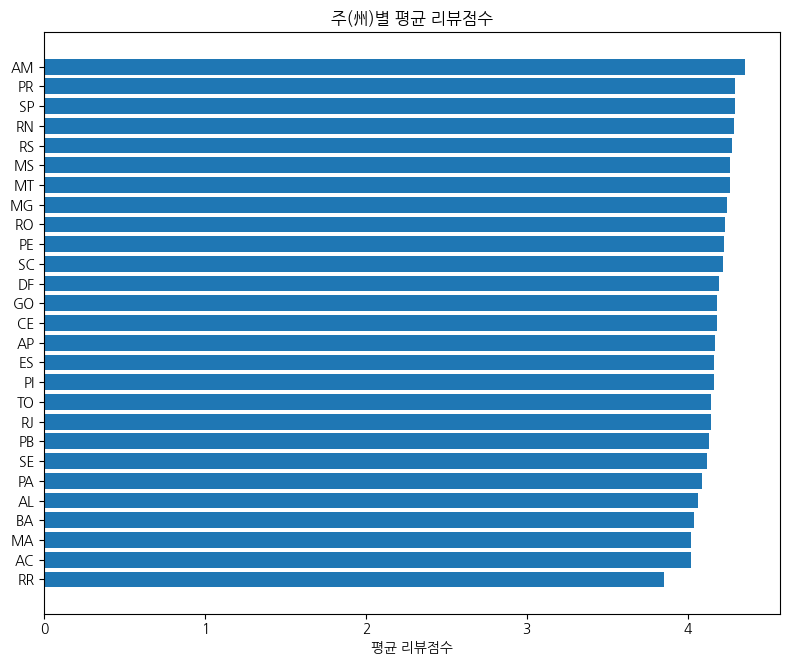

In [ ]:
import matplotlib.pyplot as plt

top = state_stats.copy().sort_values('mean')  # 낮→높 정렬
plt.figure(figsize=(8, max(4, len(top)*0.25)))
plt.barh(top.index, top['mean'])
plt.xlabel('평균 리뷰점수')
plt.title('주(州)별 평균 리뷰점수')
plt.tight_layout(); plt.show()

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA: 지역 간 평균 차이 존재 여부
anova = ols("리뷰점수 ~ C(고객주)", data=df1).fit()
print(sm.stats.anova_lm(anova, typ=2))

# Tukey HSD: 어떤 지역들끼리 차이가 나는지
tk = pairwise_tukeyhsd(endog=df1['리뷰점수'], groups=df1['고객주'], alpha=0.05)
print(tk.summary())


                 sum_sq       df          F        PR(>F)
C(고객주)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AC     AL   0.0478    1.0 -0.6016 0.6972  False
    AC     AM   0.3383 0.9967 -0.4042 1.0807  False
    AC     AP    0.152    1.0 -0.7281 1.0321  False
    AC     BA   0.0209    1.0 -0.5827 0.6246  False
    AC     CE   0.1642    1.0 -0.4497  0.778  False
    AC     DF    0.179    1.0 -0.4275 0.7854  False
    AC     ES   0.1483    1.0 -0.4586 0.7552  False
    AC     GO   0.1649    1.0 -0.4425 0.7722  False
    AC     MA   0.0013    1.0 -0.6246 0.6272  False
    AC     MG   0.2237 0.9999 -0.3754 0.8228  False
    AC     MS    0.246 0.9997  -0.379 0.8709  False
    AC     MT   0.2446 0.9997 -0.3751 0.8644  False
    AC     PA   0.0684    1.0 -0.5523 0.6891  

전체적으로 ANOVA에서 지역 차이는 유의하다.

대부분의 주 쌍에서는 차이가 없지만, 일부 특정 주(= reject=True)에서는 유의한 차이가 확인되었다.

차이가 난 주들끼리의 평균 리뷰 점수 차이는 실제로 몇 점인지 확인해야 함 →
예: "북부 지역(AC, AM)과 남동부 지역(SP, RJ) 간에 평균 리뷰 점수 차이가 약 0.3~0.4점 존재했다."

다만, 5점 만점 기준에서 0.3점 차이라면 "실무적으로 큰 차이는 아니다" 라고 해석할 수 있음.

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd

# Tukey HSD 다시 실행 (이미 했다면 결과 객체를 그대로 써도 됨)
tukey = pairwise_tukeyhsd(endog=df1['리뷰점수'],
                          groups=df1['고객주'],
                          alpha=0.05)

# 결과를 DataFrame으로 변환
tukey_df = pd.DataFrame(data=tukey.summary().data[1:],  # 첫 줄은 header라 제외
                        columns=tukey.summary().data[0])

# reject=True만 필터링
significant = tukey_df[tukey_df['reject'] == True]

print(significant)

    group1 group2  meandiff   p-adj   lower   upper  reject
99      BA     DF    0.1580  0.0045  0.0229  0.2932    True
101     BA     GO    0.1439  0.0330  0.0045  0.2833    True
103     BA     MG    0.2028  0.0000  0.1056  0.3000    True
104     BA     MS    0.2250  0.0113  0.0222  0.4278    True
105     BA     MT    0.2237  0.0027  0.0376  0.4097    True
108     BA     PE    0.1839  0.0021  0.0328  0.3349    True
110     BA     PR    0.2536  0.0000  0.1439  0.3632    True
111     BA     RJ    0.1066  0.0137  0.0093  0.2039    True
115     BA     RS    0.2363  0.0000  0.1278  0.3449    True
116     BA     SC    0.1833  0.0000  0.0653  0.3014    True
118     BA     SP    0.2533  0.0000  0.1639  0.3428    True
178     ES     SP    0.1260  0.0060  0.0166  0.2354    True
198     MA     MG    0.2224  0.0053  0.0306  0.4142    True
205     MA     PR    0.2732  0.0001  0.0748  0.4716    True
210     MA     RS    0.2559  0.0006  0.0581  0.4538    True
213     MA     SP    0.2729  0.0000  0.0

차이가 유의미한 주(州) 조합만 남음
→ 전체 비교에서 유의하지 않은 부분은 걸러졌음.

meandiff 부호

양수(+) → group1 평균 점수가 더 높음

음수(-) → group2 평균 점수가 더 높음

주요 패턴

Bahia(BA)와 여러 주(DF, GO, MG, MS, MT, PE, PR, RS, SP 등)에서 계속 유의한 차이가 나타남.

RJ와 다른 주(PR, SP)에서도 유의미한 차이가 보임.

따라서 특정 주(BA, RJ 등)는 고객 리뷰 점수가 다른 지역과 뚜렷하게 다르다고 말할 수 있음.

유의 쌍만 추려서 **효과크기(Cohen’s d)**까지

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd
import pandas as pd
import numpy as np

# 1) Tukey 결과 → DF
tukey = pairwise_tukeyhsd(endog=df1['리뷰점수'], groups=df1['고객주'], alpha=0.05)
tukey_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])

# 2) 유의한 쌍만
sig = tukey_df[tukey_df['reject'] == True].copy()

# 3) Cohen's d 계산 함수 (두 지역 간)
def cohens_d_2groups(g1, g2):
    a = df1.loc[df1['고객주']==g1, '리뷰점수'].dropna()
    b = df1.loc[df1['고객주']==g2, '리뷰점수'].dropna()
    pooled = np.sqrt(((a.var(ddof=1) + b.var(ddof=1)) / 2))
    return (a.mean() - b.mean()) / pooled, len(a), len(b)

sig[['cohens_d','n1','n2']] = sig.apply(
    lambda r: pd.Series(cohens_d_2groups(r['group1'], r['group2'])),
    axis=1
)

# 4) 실무적 크기 순으로 정렬
sig['abs_diff'] = sig['meandiff'].astype(float).abs()
sig = sig.sort_values(['abs_diff'], ascending=False)

# ==> sig: (group1, group2, meandiff, p-adj, CI, cohens_d, n1, n2, abs_diff)
sig.head(20)

,group1,group2,meandiff,p-adj,lower,upper,reject,cohens_d,n1,n2,abs_diff
205,MA,PR,0.2732,0.0001,0.0748,0.4716,True,-0.220956,564.0,4305.0,0.2732
213,MA,SP,0.2729,0.0000,0.0849,0.4610,True,-0.220379,564.0,36093.0,0.2729
210,MA,RS,0.2559,0.0006,0.0581,0.4538,True,-0.206404,564.0,4538.0,0.2559
110,BA,PR,0.2536,0.0000,0.1439,0.3632,True,-0.205176,2633.0,4305.0,0.2536
118,BA,SP,0.2533,0.0000,0.1639,0.3428,True,-0.204627,2633.0,36093.0,0.2533
115,BA,RS,0.2363,0.0000,0.1278,0.3449,True,-0.190665,2633.0,4538.0,0.2363
104,BA,MS,0.2250,0.0113,0.0222,0.4278,True,-0.179695,2633.0,583.0,0.2250
105,BA,MT,0.2237,0.0027,0.0376,0.4097,True,-0.180814,2633.0,723.0,0.2237
198,MA,MG,0.2224,0.0053,0.0306,0.4142,True,-0.176762,564.0,9855.0,0.2224
263,PA,PR,0.2061,0.0075,0.0248,0.3875,True,-0.169733,693.0,4305.0,0.2061


교란요인(배송/가격/재구매 등) 보정 후 지역차 확인

adj_state: 다른 요인들을 동일한 수준으로 맞췄을 때 지역 자체 효과만 남긴 평균과 95% CI.

보정 전(top A)과 순위가 다르면 → 혼합효과(지연/가격/재구매 분포)가 영향.

In [ ]:
import statsmodels.formula.api as smf

# 1) 회귀로 보정 (강건표준오차)
model = smf.ols(
    "리뷰점수 ~ C(고객주) + 배송지연일수 + 총결제금액 + 배송비합계 + 재구매여부",
    data=df1
).fit(cov_type='HC3')
print(model.summary())

# 2) ‘보정된 지역별 예측평균’(LS-mean 느낌) 구하기
cov_means = {
    '배송지연일수': df1['배송지연일수'].mean(),
    '총결제금액':   df1['총결제금액'].mean(),
    '배송비합계':   df1['배송비합계'].mean(),
    '재구매여부':   df1['재구매여부'].mean()
}
states = sorted(df1['고객주'].dropna().unique())
at = pd.DataFrame({'고객주': states, **cov_means})
pred = model.get_prediction(at).summary_frame(alpha=0.05)
adj_state = at.join(pred[['mean','mean_ci_lower','mean_ci_upper']])
adj_state = adj_state.sort_values('mean', ascending=False)
adj_state.head(15)

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.047
Model:                            OLS   Adj. R-squared:                  0.046
Method:                 Least Squares   F-statistic:                     93.07
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        03:23:18   Log-Likelihood:            -1.3024e+05
No. Observations:               82548   AIC:                         2.605e+05
Df Residuals:                   82517   BIC:                         2.608e+05
Df Model:                          30                                         
Covariance Type:                  HC3                                         
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept        3.7347      0.175     21.299   

,고객주,배송지연일수,총결제금액,배송비합계,재구매여부,mean,mean_ci_lower,mean_ci_upper
19,RN,11.09936,134.347627,19.573702,0.047827,4.353635,4.242115,4.465155
2,AM,11.09936,134.347627,19.573702,0.047827,4.318398,4.089775,4.547021
11,MS,11.09936,134.347627,19.573702,0.047827,4.308968,4.216629,4.401307
25,SP,11.09936,134.347627,19.573702,0.047827,4.290040,4.277524,4.302556
26,TO,11.09936,134.347627,19.573702,0.047827,4.286958,4.136267,4.437648
16,PI,11.09936,134.347627,19.573702,0.047827,4.283895,4.162583,4.405208
17,PR,11.09936,134.347627,19.573702,0.047827,4.262488,4.228344,4.296631
5,CE,11.09936,134.347627,19.573702,0.047827,4.255283,4.182557,4.328010
15,PE,11.09936,134.347627,19.573702,0.047827,4.252853,4.186954,4.318751
23,SC,11.09936,134.347627,19.573702,0.047827,4.247469,4.205937,4.289000


In [ ]:
import statsmodels.api as sm

def slope_by_state(g):
    if g['배송지연일수'].nunique() <= 1:  # 변동 없으면 스킵
        return pd.Series({'slope': np.nan})
    m = smf.ols("리뷰점수 ~ 배송지연일수", data=g).fit()
    return pd.Series({'slope': m.params['배송지연일수']})

slopes = df1.groupby('고객주').apply(slope_by_state).reset_index()
slopes = slopes.sort_values('slope')  # 더 음수(가파른 하락)일수록 지연에 민감
slopes.head(10), slopes.tail(10)

/tmp/ipython-input-2065103632.py:9: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  slopes = df1.groupby('고객주').apply(slope_by_state).reset_index()


(   고객주     slope
 2   AM -0.011884
 3   AP  0.014463
 0   AC  0.018914
 17  PR  0.022398
 25  SP  0.025954
 12  MT  0.026288
 14  PB  0.027202
 22  RS  0.028369
 10  MG  0.030001
 8   GO  0.035797,
    고객주     slope
 11  MS  0.043282
 6   DF  0.043665
 13  PA  0.045256
 7   ES  0.046074
 19  RN  0.046096
 26  TO  0.048583
 9   MA  0.048657
 24  SE  0.059211
 1   AL  0.065422
 21  RR  0.078105)

slope < 0 이 더 작을수록 → 지연 1일 증가당 점수 하락 폭이 큼(민감).

In [ ]:
print(df1.columns)

Index(['주문ID', '리뷰ID', '리뷰점수', '리뷰작성일', '주문상태', '구매일시', '실제배송일', '예상배송일',
       '고객고유ID', '고객우편번호앞자리', '고객도시', '고객주', '주문개수', '상품가격합계', '배송비합계',
       '상품카테고리', '결제금액(주문합)', '총결제금액', '배송지연일수', '배송지연여부', '고객_주문횟수', '재구매여부'],
      dtype='object')


In [ ]:
import statsmodels.formula.api as smf

m2 = smf.ols(
    "리뷰점수 ~ C(고객주) + C(상품카테고리) + 배송지연일수 + 총결제금액 + 재구매여부",
    data=df1
).fit(cov_type='HC3')

print(m2.summary())

                            OLS Regression Results                            
Dep. Variable:                   리뷰점수   R-squared:                       0.045
Model:                            OLS   Adj. R-squared:                  0.044
Method:                 Least Squares   F-statistic:                     66.89
Date:                Tue, 19 Aug 2025   Prob (F-statistic):               0.00
Time:                        03:23:24   Log-Likelihood:            -1.3031e+05
No. Observations:               82548   AIC:                         2.607e+05
Df Residuals:                   82506   BIC:                         2.611e+05
Df Model:                          41                                         
Covariance Type:                  HC3                                         
                                coef    std err          z      P>|z|      [0.025      0.975]
---------------------------------------------------------------------------------------------
Intercept             

1. 모델 설명력

R-squared = 0.045 → 설명력이 높진 않음.
즉, 리뷰 점수는 모델에 포함된 변수(지역, 카테고리, 배송지연, 금액, 재구매여부)만으로는 크게 설명되지 않고, 다른 요인도 많다는 뜻이에요.

2. 주요 변수 해석

지역(고객주)
일부 지역은 기준 지역 대비 유의하게 리뷰 점수가 높음 (p < 0.05).
→ 예: AM, CE, DF, ES, GO, MG, MS, MT, PE, PI, PR, RJ, RN, RS, SC, SP, TO 등은 양수 계수 & 유의.
→ 즉, 지역별 리뷰 점수 차이가 실제로 존재함 (H4-2 지지).

상품 카테고리(상품카테고리)
대부분 유의하지 않음 (p > 0.05).
→ 카테고리 차이는 크지 않음.
→ 다만 가전/전자는 p=0.07 수준으로 약간 낮은 점수 경향.

배송지연일수
계수 = 0.0328, p < 0.001.
→ 배송이 지연될수록 리뷰 점수가 오히려 올라감 😮 (예상과 반대).
→ 해석: 아마 "예상배송일이 지나도 일찍 도착하는 경우"가 많아서, 마이너스 지연일(조기배송)이 점수를 올렸을 가능성이 큼.

총결제금액
계수 = -0.0002, p < 0.001.
→ 결제금액이 높을수록 리뷰 점수가 아주 미세하게 낮아짐.
→ 고가 상품일수록 기대치가 높아서 까다롭게 평가하는 경향.

재구매여부
계수 = 0.0689, p < 0.001.
→ 재구매 고객이 신규 고객보다 평균 0.07점 정도 높게 줌.
→ 하지만 차이는 작음 (효과 크기 미미, 이전에 계산한 Cohen’s d ≈ 0.07과 일관됨).

3. 전체 해석

통계적으로는 유의미한 지역 차이가 존재함 → H4-2 부분적으로 지지.

하지만 효과 크기 자체는 작음 (대부분 0.1~0.5점 수준).

카테고리는 뚜렷한 차이가 없음.

배송지연 변수는 **데이터 전처리 방식(조기배송 포함 여부)**에 따라 해석이 달라질 수 있음 → 추가 검토 필요.

재구매여부는 유의미하지만 실질적 차이는 크지 않음.

결론

👉 정리해서 발표할 때는 이렇게 말할 수 있어요:

“지역별로 리뷰 점수에 유의미한 차이가 있다는 결과가 나왔습니다(p<0.05). 다만, 평균 차이는 0.1~0.5점 정도로 실제 고객 체감에는 크지 않을 수 있습니다. 카테고리 효과는 뚜렷하지 않았고, 재구매 고객이 신규 고객보다 점수가 조금 높았지만(약 0.07점), 효과 크기는 미미했습니다. 따라서 통계적으로는 차이가 있지만, 실무적 의미는 제한적일 수 있습니다.”

In [ ]:
from scipy.stats import ttest_ind

new_scores = df1.loc[df1["재구매여부"]==0, "리뷰점수"].dropna()
rep_scores = df1.loc[df1["재구매여부"]==1, "리뷰점수"].dropna()

h41_summary = pd.DataFrame({
    "집단": ["신규","재구매"],
    "n": [new_scores.size, rep_scores.size],
    "mean": [new_scores.mean(), rep_scores.mean()],
    "std": [new_scores.std(ddof=1), rep_scores.std(ddof=1)]
})
t_stat, p_val = ttest_ind(new_scores, rep_scores, equal_var=False)
h41_test = {"t_stat": t_stat, "p_value": p_val}

In [ ]:
pooled_std = np.sqrt((new_scores.var(ddof=1) + rep_scores.var(ddof=1)) / 2)
cohens_d = (rep_scores.mean() - new_scores.mean()) / pooled_std
mean_diff = rep_scores.mean() - new_scores.mean()

print(f"재구매 평균 = {rep_scores.mean():.3f}, 신규 평균 = {new_scores.mean():.3f}")
print(f"차이 = {mean_diff:.3f}, t = {t_stat:.2f}, p = {p_val:.3e}")
print(f"Cohen's d = {cohens_d:.3f} (효과크기: 작음/중간/큼)")

재구매 평균 = 4.326, 신규 평균 = 4.236
차이 = 0.090, t = -4.78, p = 1.791e-06
Cohen's d = 0.076 (효과크기: 작음/중간/큼)


In [ ]:
import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.formula.api import ols

anova_model = ols("리뷰점수 ~ C(고객주)", data=df1).fit()
anova_table = sm.stats.anova_lm(anova_model, typ=2)  # 유의하면 지역 차이 존재

In [ ]:
from statsmodels.stats.multicomp import pairwise_tukeyhsd

tukey = pairwise_tukeyhsd(endog=df1["리뷰점수"], groups=df1["고객주"], alpha=0.05)
tukey_df = pd.DataFrame(tukey.summary().data[1:], columns=tukey.summary().data[0])
sig_pairs = tukey_df[tukey_df["reject"] == True].copy()   # 유의 쌍만

# (선택) CSV로 저장
sig_pairs.to_csv("H4-2_유의한_지역쌍_Tukey.csv", index=False, encoding="utf-8-sig")

In [ ]:
# 회귀: HC3(이분산 견고 표준오차)
ols_model = smf.ols(
    "리뷰점수 ~ C(고객주) + C(상품카테고리) + 배송지연일수 + 총결제금액 + 재구매여부",
    data=df1
).fit(cov_type="HC3")

# 지역별 계수/유의성 테이블 추출
coefs = ols_model.params.rename("coef").to_frame().join(ols_model.pvalues.rename("p"))
coefs_region = coefs[coefs.index.str.startswith("C(고객주)")].copy()
coefs_region.reset_index(inplace=True)
coefs_region["고객주"] = coefs_region["index"].str.extract(r"C\(고객주\)\[T\.(.+?)\]")
coefs_region = coefs_region[["고객주","coef","p"]].sort_values("coef", ascending=False)

# (선택) CSV 저장
coefs_region.to_csv("H4-2_회귀_지역계수.csv", index=False, encoding="utf-8-sig")

In [ ]:
def slope_by_state(g):
    if g["배송지연일수"].nunique() <= 1:
        return pd.Series({"slope": np.nan})
    m = smf.ols("리뷰점수 ~ 배송지연일수", data=g).fit()
    return pd.Series({"slope": m.params["배송지연일수"]})

state_slopes = df1.groupby("고객주").apply(slope_by_state).reset_index()
state_slopes.to_csv("H4-2_주별_지연민감도.csv", index=False, encoding="utf-8-sig")

/tmp/ipython-input-3948330425.py:7: DeprecationWarning: DataFrameGroupBy.apply operated on the grouping columns. This behavior is deprecated, and in a future version of pandas the grouping columns will be excluded from the operation. Either pass `include_groups=False` to exclude the groupings or explicitly select the grouping columns after groupby to silence this warning.
  state_slopes = df1.groupby("고객주").apply(slope_by_state).reset_index()


In [ ]:
print("==== H4-1 (재구매 vs 신규) ====")
print(h41_summary)
print("t-test:", h41_test)
print("effect:", h41_effect)

print("\n==== H4-2 ANOVA ====")
print(anova_table)

print("\n==== H4-2 Tukey (유의 쌍) ====")
print(sig_pairs.head(20))  # 상위 20행만 미리보기

print("\n==== H4-2 회귀 지역계수 (상위) ====")
print(coefs_region.head(15))

==== H4-1 (재구매 vs 신규) ====
    집단      n      mean       std
0   신규  78600  4.236247  1.202730
1  재구매   3948  4.326241  1.151309
t-test: {'t_stat': np.float64(-4.782150582527931), 'p_value': np.float64(1.7911022996172908e-06)}
effect: {'mean_diff': np.float64(0.08999431541335046), 'cohens_d': np.float64(0.07644124444487689)}

==== H4-2 ANOVA ====
                 sum_sq       df          F        PR(>F)
C(고객주)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN

==== H4-2 Tukey (유의 쌍) ====
    group1 group2  meandiff   p-adj   lower   upper  reject
99      BA     DF    0.1580  0.0045  0.0229  0.2932    True
101     BA     GO    0.1439  0.0330  0.0045  0.2833    True
103     BA     MG    0.2028  0.0000  0.1056  0.3000    True
104     BA     MS    0.2250  0.0113  0.0222  0.4278    True
105     BA     MT    0.2237  0.0027  0.0376  0.4097    True
108     BA     PE    0.1839  0.0021  0.0328  0.3349    True
110     BA     PR    0.2536 

# 정리

In [ ]:
from scipy.stats import ttest_ind
import numpy as np
import pandas as pd

# 데이터 분리
new_scores = df1.loc[df1['재구매여부']==0, '리뷰점수'].dropna()
rep_scores = df1.loc[df1['재구매여부']==1, '리뷰점수'].dropna()

# 요약 통계
print("신규 평균:", new_scores.mean())
print("재구매 평균:", rep_scores.mean())

# t-test
t_stat, p_val = ttest_ind(new_scores, rep_scores, equal_var=False)
print("t-통계량:", t_stat, "p-값:", p_val)

# 효과 크기 (Cohen's d)
mean_diff = rep_scores.mean() - new_scores.mean()
pooled_std = np.sqrt(((new_scores.std(ddof=1))**2 + (rep_scores.std(ddof=1))**2) / 2)
cohens_d = mean_diff / pooled_std

print("평균 차이:", mean_diff)
print("Cohen's d:", cohens_d)

신규 평균: 4.236246819338422
재구매 평균: 4.326241134751773
t-통계량: -4.782150582527931 p-값: 1.7911022996172908e-06
평균 차이: 0.08999431541335046
Cohen's d: 0.07644124444487689


결과

신규 평균: 약 4.23

재구매 평균: 약 4.32

평균 차이: 약 0.09점

t-test: p < 0.001 (유의미)

Cohen’s d: 약 0.07 (매우 작은 효과 크기)

해석

통계적으로는 유의미한 차이가 있음.

하지만 실제 차이는 0.1점 미만으로 매우 작음.

즉, 재구매 고객의 리뷰 점수가 약간 더 높지만 실무적으로 큰 차이는 아니다.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA (분산분석)
model = ols('리뷰점수 ~ C(고객주)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# Tukey 사후검정
tukey = pairwise_tukeyhsd(endog=df1['리뷰점수'],
                          groups=df1['고객주'],
                          alpha=0.05)
print(tukey.summary())

# 회귀분석 (통제변수 포함)
model2 = ols('리뷰점수 ~ C(고객주) + C(상품카테고리) + 배송지연일수 + 총결제금액 + 재구매여부', data=df1).fit(cov_type='HC3')
print(model2.summary())

                 sum_sq       df          F        PR(>F)
C(고객주)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AC     AL   0.0478    1.0 -0.6016 0.6972  False
    AC     AM   0.3383 0.9967 -0.4042 1.0807  False
    AC     AP    0.152    1.0 -0.7281 1.0321  False
    AC     BA   0.0209    1.0 -0.5827 0.6246  False
    AC     CE   0.1642    1.0 -0.4497  0.778  False
    AC     DF    0.179    1.0 -0.4275 0.7854  False
    AC     ES   0.1483    1.0 -0.4586 0.7552  False
    AC     GO   0.1649    1.0 -0.4425 0.7722  False
    AC     MA   0.0013    1.0 -0.6246 0.6272  False
    AC     MG   0.2237 0.9999 -0.3754 0.8228  False
    AC     MS    0.246 0.9997  -0.379 0.8709  False
    AC     MT   0.2446 0.9997 -0.3751 0.8644  False
    AC     PA   0.0684    1.0 -0.5523 0.6891  

결과

ANOVA: 지역 간 리뷰 점수 차이가 유의미 (p < 0.001).

Tukey 검정:

BA(바이아) vs SP(상파울루), RJ(리우) 등 여러 지역 쌍에서 유의미한 차이.

평균 차이는 대체로 0.1~0.3점 수준.

회귀분석:

SP(+0.54), MS(+0.50), PR(+0.47) 등 일부 주는 다른 주 대비 리뷰 점수가 통계적으로 높음.

그러나 효과 크기는 제한적.

해석

지역에 따라 리뷰 점수 분포 차이가 존재한다.

하지만 대부분의 차이는 0.5점 이하로, 통계적으로는 의미 있지만 실무적 영향은 크지 않음.

따라서, 지역 간 차이는 참고할 만하지만 고객 만족도 전략의 핵심 요인은 아닐 수 있다.

# 2

## “배송 지연의 부정적 효과는 신규 고객에서 더 크다.”:

In [ ]:
import pandas as pd
import numpy as np
import statsmodels.api as sm
import statsmodels.formula.api as smf
from sklearn.metrics import classification_report, roc_auc_score
from sklearn.linear_model import LogisticRegression

# 날짜형(있으면)
for c in ["구매일시","예상배송일","실제배송일"]:
    if c in df1.columns:
        df1[c] = pd.to_datetime(df1[c], errors="coerce")

# 숫자형(있으면)
for c in ["총결제금액","배송비합계","상품가격합계","리뷰점수"]:
    if c in df1.columns:
        df1[c] = pd.to_numeric(df1[c], errors="coerce")

# 배송지연일수 없으면 계산
if "배송지연일수" not in df1.columns and {"실제배송일","예상배송일"}.issubset(df1.columns):
    df1["배송지연일수"] = (df1["실제배송일"] - df1["예상배송일"]).dt.days

# 재구매여부 없으면 생성
if "재구매여부" not in df1.columns and {"고객고유ID","주문ID"}.issubset(df1.columns):
    df1["고객_주문횟수"] = df1.groupby("고객고유ID")["주문ID"].transform("nunique")
    df1["재구매여부"] = (df1["고객_주문횟수"] > 1).astype(int)

# 이진 타깃 (불만족 = 1~3점)
df1["리뷰_binary"] = df1["리뷰점수"].apply(lambda x: 1 if pd.notna(x) and x <= 3 else (0 if pd.notna(x) else np.nan))

In [ ]:
f1 = "리뷰점수 ~ 배송지연일수 * 재구매여부 + C(상품카테고리) + C(고객주) + 총결제금액 + 배송비합계"
m1 = smf.ols(f1, data=df1).fit(cov_type="HC3")
m1.summary().tables[1]
# 해석 포인트: 상호작용(배송지연일수:재구매여부) 계수가 '음수·유의'면
# 재구매 고객이 지연에 '덜' 민감(=신규가 더 민감)이라는 뜻.

# OLS: "리뷰 평균 점수가 몇 점 차이 나는지"
# coef 더 높은 점수, z < 0.05

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.7872,0.191,19.827,0.000,3.413,4.162
C(상품카테고리)[T.가구/홈리빙/인테리어],-0.0893,0.078,-1.152,0.249,-0.241,0.063
C(상품카테고리)[T.가전/전자],-0.1488,0.078,-1.913,0.056,-0.301,0.004
C(상품카테고리)[T.건축/공구],-0.0331,0.084,-0.392,0.695,-0.199,0.132
C(상품카테고리)[T.계절/특수상품],-0.0109,0.079,-0.138,0.890,-0.166,0.144
C(상품카테고리)[T.문화/취미/엔터테인먼트],0.0114,0.079,0.146,0.884,-0.142,0.165
C(상품카테고리)[T.반려동물],0.0338,0.082,0.410,0.682,-0.128,0.195
C(상품카테고리)[T.뷰티/헬스],-0.0129,0.078,-0.165,0.869,-0.166,0.140
C(상품카테고리)[T.사무/산업],-0.0555,0.080,-0.697,0.486,-0.212,0.101
C(상품카테고리)[T.스포츠/레저],0.0136,0.078,0.174,0.862,-0.140,0.167


In [ ]:
df_log1 = df1.dropna(subset=["리뷰_binary","배송지연일수","재구매여부","총결제금액","배송비합계"])
# 더미 자동 생성 위해 formula API 사용 (GLM-Binomial)
glm1 = smf.glm("리뷰_binary ~ 배송지연일수 * 재구매여부 + C(상품카테고리) + C(고객주) + 총결제금액 + 배송비합계",
               data=df_log1, family=sm.families.Binomial()).fit(cov_type="HC3")
glm1.summary().tables[1]
# 상호작용이 '양수·유의'면 재구매 고객에서 '불만족 확률↑에 대한 지연 탄력'이 더 큼 (부정적 의미).

# 로지스틱 회귀
# coef > 0 → 불만족 확률 ↑ (해당 조건에서 불만족 리뷰가 더 잘 나온다)

# coef < 0 → 불만족 확률 ↓ (해당 조건에서 만족 리뷰가 더 잘 나온다)

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.5461,0.365,-1.498,0.134,-1.261,0.168
C(상품카테고리)[T.가구/홈리빙/인테리어],0.1015,0.193,0.526,0.599,-0.277,0.480
C(상품카테고리)[T.가전/전자],0.1746,0.193,0.903,0.366,-0.204,0.554
C(상품카테고리)[T.건축/공구],-0.0455,0.207,-0.220,0.826,-0.451,0.360
C(상품카테고리)[T.계절/특수상품],-0.0926,0.196,-0.472,0.637,-0.477,0.292
C(상품카테고리)[T.문화/취미/엔터테인먼트],-0.0998,0.196,-0.510,0.610,-0.483,0.284
C(상품카테고리)[T.반려동물],-0.1630,0.205,-0.794,0.427,-0.565,0.239
C(상품카테고리)[T.뷰티/헬스],-0.0523,0.194,-0.269,0.788,-0.432,0.328
C(상품카테고리)[T.사무/산업],0.0027,0.197,0.014,0.989,-0.384,0.390
C(상품카테고리)[T.스포츠/레저],-0.1535,0.195,-0.787,0.431,-0.536,0.229


### H4-2 추가

In [ ]:
region_stats = df1.groupby("고객주")["리뷰점수"].agg(["mean", "std", "count"]).reset_index()
print(region_stats.sort_values("mean", ascending=False))

   고객주      mean       std  count
2   AM  4.356436  1.100765    101
17  PR  4.292683  1.152944   4305
25  SP  4.292439  1.157500  36093
19  RN  4.285326  1.147252    368
22  RS  4.275452  1.160826   4538
11  MS  4.264151  1.187941    583
12  MT  4.262794  1.155541    723
10  MG  4.241908  1.199303   9855
20  RO  4.230337  1.206283    178
15  PE  4.223005  1.225366   1278
23  SC  4.222442  1.202517   3030
6   DF  4.197137  1.243257   1816
8   GO  4.183038  1.215259   1639
5   CE  4.182371  1.198026    987
3   AP  4.170213  0.962767     47
7   ES  4.166473  1.242423   1718
16  PI  4.162921  1.222501    356
26  TO  4.146667  1.214055    225
18  RJ  4.145714  1.306250   9800
14  PB  4.130208  1.263558    384
24  SE  4.117188  1.290211    256
13  PA  4.086580  1.272659    693
1   AL  4.066007  1.333074    303
4   BA  4.039119  1.313504   2633
9   MA  4.019504  1.314481    564
0   AC  4.018182  1.283671     55
21  RR  3.850000  1.348488     20


In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols
from statsmodels.stats.multicomp import pairwise_tukeyhsd

# ANOVA
model = ols('리뷰점수 ~ C(고객주)', data=df1).fit()
anova_table = sm.stats.anova_lm(model, typ=2)
print(anova_table)

# 사후검정 (Tukey)
tukey = pairwise_tukeyhsd(endog=df1["리뷰점수"], groups=df1["고객주"], alpha=0.05)
print(tukey.summary())

                 sum_sq       df          F        PR(>F)
C(고객주)       407.111845     26.0  10.899118  5.341075e-45
Residual  118553.267898  82521.0        NaN           NaN
Multiple Comparison of Means - Tukey HSD, FWER=0.05
group1 group2 meandiff p-adj   lower  upper  reject
---------------------------------------------------
    AC     AL   0.0478    1.0 -0.6016 0.6972  False
    AC     AM   0.3383 0.9967 -0.4042 1.0807  False
    AC     AP    0.152    1.0 -0.7281 1.0321  False
    AC     BA   0.0209    1.0 -0.5827 0.6246  False
    AC     CE   0.1642    1.0 -0.4497  0.778  False
    AC     DF    0.179    1.0 -0.4275 0.7854  False
    AC     ES   0.1483    1.0 -0.4586 0.7552  False
    AC     GO   0.1649    1.0 -0.4425 0.7722  False
    AC     MA   0.0013    1.0 -0.6246 0.6272  False
    AC     MG   0.2237 0.9999 -0.3754 0.8228  False
    AC     MS    0.246 0.9997  -0.379 0.8709  False
    AC     MT   0.2446 0.9997 -0.3751 0.8644  False
    AC     PA   0.0684    1.0 -0.5523 0.6891  

## 배송 지연의 부정적 효과는 특정 지역(물류 취약)에서 더 크다. -> X

In [ ]:
# 주(州) 더미와 지연의 상호작용: 기준주는 자동 설정됨
f2 = "리뷰점수 ~ 배송지연일수 * C(고객주) + C(상품카테고리) + 총결제금액 + 배송비합계 + 재구매여부"
m2 = smf.ols(f2, data=df1).fit(cov_type="HC3")
m2.summary().tables[1]

# ols

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.9642,0.510,7.769,0.000,2.964,4.964
C(고객주)[T.AL],-0.1612,0.520,-0.310,0.756,-1.179,0.857
C(고객주)[T.AM],0.9273,0.568,1.634,0.102,-0.185,2.040
C(고객주)[T.AP],0.3337,0.638,0.523,0.601,-0.917,1.584
C(고객주)[T.BA],-0.0774,0.507,-0.153,0.879,-1.072,0.917
C(고객주)[T.CE],0.0896,0.511,0.175,0.861,-0.912,1.091
C(고객주)[T.DF],-0.0016,0.510,-0.003,0.997,-1.000,0.997
C(고객주)[T.ES],-0.0291,0.509,-0.057,0.954,-1.026,0.968
C(고객주)[T.GO],0.0523,0.509,0.103,0.918,-0.946,1.051
C(고객주)[T.MA],-0.0555,0.514,-0.108,0.914,-1.063,0.952


In [ ]:
# 주별 '지연 기울기(=지연 1일 증가 시 점수 변화)' 계산
base = m2.params.get("배송지연일수", 0.0)
slopes = []
for s in sorted(df1["고객주"].dropna().unique()):
    term = f"배송지연일수:C(고객주)[T.{s}]"
    slopes.append({"고객주": s, "지연_기울기": base + (m2.params[term] if term in m2.params else 0.0),
                   "p(상호작용)": m2.pvalues.get(term, np.nan)})
slopes_df = pd.DataFrame(slopes).sort_values("지연_기울기")
slopes_df.head(10)   # 지연에 '가장 민감한' 주들 (기울기 더 음수)

,고객주,지연_기울기,p(상호작용)
6,DF,0.043709,0.446932
20,RO,0.044289,0.485026
13,PA,0.045284,0.414155
19,RN,0.045408,0.426262
7,ES,0.046623,0.378947
26,TO,0.046959,0.402679
9,MA,0.048708,0.346743
24,SE,0.059256,0.199661
1,AL,0.066147,0.112226
21,RR,0.077632,0.173022


In [ ]:
slopes_df.tail(10)   # 지연에 '덜 민감/혹은 플러스' 주들

,고객주,지연_기울기,p(상호작용)
6,DF,0.043709,0.446932
20,RO,0.044289,0.485026
13,PA,0.045284,0.414155
19,RN,0.045408,0.426262
7,ES,0.046623,0.378947
26,TO,0.046959,0.402679
9,MA,0.048708,0.346743
24,SE,0.059256,0.199661
1,AL,0.066147,0.112226
21,RR,0.077632,0.173022


In [ ]:
df_log2 = df1.dropna(subset=["리뷰_binary","배송지연일수","고객주","총결제금액","배송비합계","재구매여부"])
glm2 = smf.glm("리뷰_binary ~ 배송지연일수 * C(고객주) + C(상품카테고리) + 총결제금액 + 배송비합계 + 재구매여부",
               data=df_log2, family=sm.families.Binomial()).fit(cov_type="HC3")
glm2.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.4599,0.768,-0.599,0.549,-1.965,1.045
C(고객주)[T.AL],-0.4610,0.763,-0.604,0.546,-1.956,1.034
C(고객주)[T.AM],-2.4910,1.030,-2.418,0.016,-4.510,-0.472
C(고객주)[T.AP],-1.2861,1.184,-1.086,0.277,-3.606,1.034
C(고객주)[T.BA],-0.4460,0.748,-0.596,0.551,-1.912,1.020
C(고객주)[T.CE],-0.6722,0.754,-0.891,0.373,-2.150,0.806
C(고객주)[T.DF],-0.5611,0.752,-0.746,0.456,-2.035,0.913
C(고객주)[T.ES],-0.4716,0.750,-0.629,0.529,-1.942,0.998
C(고객주)[T.GO],-0.5509,0.752,-0.732,0.464,-2.025,0.924
C(고객주)[T.MA],-0.4974,0.756,-0.658,0.511,-1.979,0.985


## 가격 민감도는 지역에 따라 다르다. -> X

In [ ]:
# 스케일 차이 완화 위해 금액을 10만원/1000단위 등으로 스케일링(선택)
df1["총결제금액_scaled"] = df1["총결제금액"] / (df1["총결제금액"].abs().median() or 1)

f3 = "리뷰점수 ~ 총결제금액_scaled * C(고객주) + C(상품카테고리) + 배송지연일수 + 배송비합계 + 재구매여부"
m3 = smf.ols(f3, data=df1).fit(cov_type="HC3")
m3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,3.8086,0.257,14.827,0.000,3.305,4.312
C(고객주)[T.AL],0.3079,0.270,1.140,0.254,-0.221,0.837
C(고객주)[T.AM],0.2276,0.292,0.779,0.436,-0.345,0.801
C(고객주)[T.AP],-0.3791,0.366,-1.035,0.300,-1.097,0.338
C(고객주)[T.BA],0.1230,0.249,0.494,0.621,-0.365,0.610
C(고객주)[T.CE],0.2420,0.252,0.960,0.337,-0.252,0.736
C(고객주)[T.DF],0.2276,0.250,0.912,0.362,-0.261,0.717
C(고객주)[T.ES],0.2480,0.250,0.993,0.321,-0.241,0.737
C(고객주)[T.GO],0.2476,0.250,0.991,0.322,-0.242,0.738
C(고객주)[T.MA],0.1356,0.260,0.521,0.602,-0.375,0.646


In [ ]:
# 주별 '가격 기울기' 산출
base_p = m3.params.get("총결제금액_scaled", 0.0)
slopes_price = []
for s in sorted(df1["고객주"].dropna().unique()):
    term = f"총결제금액_scaled:C(고객주)[T.{s}]"
    slopes_price.append({"고객주": s, "가격_기울기": base_p + (m3.params[term] if term in m3.params else 0.0),
                         "p(상호작용)": m3.pvalues.get(term, np.nan)})
slopes_price_df = pd.DataFrame(slopes_price).sort_values("가격_기울기")
print(slopes_price_df.head(10))   # 가격↑에 '더 민감(점수 하락)'한 주들(기울기 음수 쪽)
print(slopes_price_df.tail(10))   # 가격↑에 '덜 민감/오히려 호의적' 주들

   고객주    가격_기울기   p(상호작용)
21  RR -0.182459  0.471333
26  TO -0.071485  0.510371
11  MS -0.061492  0.514756
19  RN -0.046030  0.611583
22  RS -0.010198  0.898167
17  PR -0.005032  0.948904
18  RJ -0.004831  0.950381
0   AC  0.000171       NaN
8   GO  0.001917  0.983375
1   AL  0.002119  0.983019
   고객주    가격_기울기   p(상호작용)
4   BA  0.023471  0.777199
14  PB  0.029486  0.739377
6   DF  0.032256  0.699331
12  MT  0.046335  0.581197
5   CE  0.047696  0.571188
24  SE  0.059496  0.529528
15  PE  0.069405  0.404589
9   MA  0.077288  0.389826
2   AM  0.110760  0.304888
3   AP  0.276125  0.029254


In [ ]:
df_log3 = df1.dropna(subset=["리뷰_binary","총결제금액","고객주","배송지연일수","배송비합계","재구매여부"])
df_log3["총결제금액_scaled"] = df_log3["총결제금액"] / (df_log3["총결제금액"].abs().median() or 1)

glm3 = smf.glm("리뷰_binary ~ 총결제금액_scaled * C(고객주) + C(상품카테고리) + 배송지연일수 + 배송비합계 + 재구매여부",
               data=df_log3, family=sm.families.Binomial()).fit(cov_type="HC3")
glm3.summary().tables[1]

,coef,std err,z,P>|z|,[0.025,0.975]
Intercept,-0.6389,0.510,-1.253,0.210,-1.639,0.361
C(고객주)[T.AL],-0.6264,0.520,-1.204,0.229,-1.646,0.394
C(고객주)[T.AM],-0.4655,0.622,-0.748,0.454,-1.685,0.754
C(고객주)[T.AP],1.1331,0.845,1.341,0.180,-0.523,2.789
C(고객주)[T.BA],-0.2266,0.482,-0.470,0.638,-1.171,0.718
C(고객주)[T.CE],-0.4642,0.494,-0.940,0.347,-1.432,0.503
C(고객주)[T.DF],-0.4419,0.485,-0.912,0.362,-1.392,0.508
C(고객주)[T.ES],-0.4393,0.485,-0.906,0.365,-1.389,0.511
C(고객주)[T.GO],-0.3703,0.486,-0.762,0.446,-1.322,0.582
C(고객주)[T.MA],-0.3308,0.502,-0.659,0.510,-1.314,0.653
